In [33]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json 
import numpy as np
import plotly.express as px
import plotly
import seaborn as sns

In [2]:
df_pop=pd.read_excel('nst-est2019-01.xlsx')
df_pop

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
4,Northeast,55317240,55318443,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Note: The estimates are based on the 2010 Cens...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,Table 1. Annual Estimates of the Resident Popu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#This code will remove/drop the unnecessay rows. Cleaning up the excel file, axis=0 refers to rows.

df_pop.drop([0,1,61,62,63,64,64,65,59],axis=0, inplace=True)
df_pop

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
4,Northeast,55317240,55318443,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
5,Midwest,66927001,66929725,66974416,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
6,South,114555744,114563030,114866680,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
7,West,71945553,71946907,72100436,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
8,.Alabama,4779736,4780125,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
9,.Alaska,710231,710249,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
10,.Arizona,6392017,6392288,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
11,.Arkansas,2915918,2916031,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0


In [4]:
# The orginal name of the columns will be replaced with new name. The new names for the columns will be renamed from row 2 as a reference. 


df_pop1=df_pop.rename(columns={'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)':'States'})
df_pop2=df_pop1.rename(columns={'Unnamed: 1':'Census','Unnamed: 2':'Estimates Base',
                                'Unnamed: 3':'2010','Unnamed: 4':'2011','Unnamed: 5':'2012',
                                'Unnamed: 6':'2013','Unnamed: 7':'2014',
                                'Unnamed: 8':'2015', 'Unnamed: 9':'2016','Unnamed: 10':'2017', 
                                'Unnamed: 11':'2018','Unnamed: 12':'2019'})

In [5]:
df_pop2

,States,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
4,Northeast,55317240,55318443,55380134,55604223.0,55775216.0,55901806.0,56006011.0,56034684.0,56042330.0,56059240.0,56046620.0,55982803.0
5,Midwest,66927001,66929725,66974416,67157800.0,67336743.0,67560379.0,67745167.0,67860583.0,67987540.0,68126781.0,68236628.0,68329004.0
6,South,114555744,114563030,114866680,116006522.0,117241208.0,118364400.0,119624037.0,120997341.0,122351760.0,123542189.0,124569433.0,125580448.0
7,West,71945553,71946907,72100436,72788329.0,73477823.0,74167130.0,74925793.0,75742555.0,76559681.0,77257329.0,77834820.0,78347268.0
8,.Alabama,4779736,4780125,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
9,.Alaska,710231,710249,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
10,.Arizona,6392017,6392288,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
11,.Arkansas,2915918,2916031,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0


In [6]:
# Rows 2,4,5,6,7 will be dropped since they are not needed, axis=0 refers to rows. 

df_pop2.drop([2,4,5,6,7],axis=0, inplace=True)
df_pop2

,States,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
8,.Alabama,4779736,4780125,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
9,.Alaska,710231,710249,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
10,.Arizona,6392017,6392288,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
11,.Arkansas,2915918,2916031,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
12,.California,37253956,37254519,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
13,.Colorado,5029196,5029319,5047349,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
14,.Connecticut,3574097,3574147,3579114,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
15,.Delaware,897934,897937,899593,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
16,.District of Columbia,601723,601767,605226,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0


In [7]:
#https://www.pythondaddy.com/python/how-to-remove-punctuation-from-a-dataframe-in-pandas-and-python/ 
#https://www.youtube.com/watch?v=HU0re8UJViM
# removing the period from the states name under the States column 
df_pop2['States']=df_pop2['States'].str.replace(r'\W',"")

In [8]:
df_pop2


,States,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,UnitedStates,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
8,Alabama,4779736,4780125,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
9,Alaska,710231,710249,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
10,Arizona,6392017,6392288,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
11,Arkansas,2915918,2916031,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
12,California,37253956,37254519,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
13,Colorado,5029196,5029319,5047349,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
14,Connecticut,3574097,3574147,3579114,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
15,Delaware,897934,897937,899593,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
16,DistrictofColumbia,601723,601767,605226,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0


In [9]:
df_pop2.iat[9,0]='District of Columbia'

In [10]:
df_pop2.iat[0,0]

'UnitedStates'

In [11]:
df_pop2.loc[3]

States            UnitedStates
Census               308745538
Estimates Base       308758105
2010                 309321666
2011               3.11557e+08
2012               3.13831e+08
2013               3.15994e+08
2014               3.18301e+08
2015               3.20635e+08
2016               3.22941e+08
2017               3.24986e+08
2018               3.26688e+08
2019                3.2824e+08
Name: 3, dtype: object

In [12]:
df_pop2

,States,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
3,UnitedStates,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
8,Alabama,4779736,4780125,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
9,Alaska,710231,710249,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
10,Arizona,6392017,6392288,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
11,Arkansas,2915918,2916031,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
12,California,37253956,37254519,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
13,Colorado,5029196,5029319,5047349,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
14,Connecticut,3574097,3574147,3579114,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
15,Delaware,897934,897937,899593,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
16,District of Columbia,601723,601767,605226,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0


In [13]:
#reset the index because of the .drop function caused the index to be out of order. This caused the old index to be created into a new colummn.
#https://datatofish.com/reset-index-pandas-dataframe/
df_pop2=df_pop2.reset_index()

In [14]:
df_pop2

,index,States,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,3,UnitedStates,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,8,Alabama,4779736,4780125,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
2,9,Alaska,710231,710249,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
3,10,Arizona,6392017,6392288,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
4,11,Arkansas,2915918,2916031,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
5,12,California,37253956,37254519,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
6,13,Colorado,5029196,5029319,5047349,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
7,14,Connecticut,3574097,3574147,3579114,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
8,15,Delaware,897934,897937,899593,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
9,16,District of Columbia,601723,601767,605226,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0


In [17]:
# Drop the old index column 
df_pop2.drop('index',axis=1, inplace=True)

In [15]:
df_pop2.shape

(53, 14)

In [18]:
df_pop2

,States,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,UnitedStates,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Alabama,4779736,4780125,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
2,Alaska,710231,710249,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
3,Arizona,6392017,6392288,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
4,Arkansas,2915918,2916031,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
5,California,37253956,37254519,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
6,Colorado,5029196,5029319,5047349,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
7,Connecticut,3574097,3574147,3579114,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
8,Delaware,897934,897937,899593,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
9,District of Columbia,601723,601767,605226,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0


In [23]:
#Add in a space between the two-name states. Example SouthCarolina becomes South Carolina
df_pop2.iat[0,0]='United States'
df_pop2.iat[9,0]='District of Columbia'
df_pop2.iat[30,0]='New Hampshire'
df_pop2.iat[31,0]='New Jersey'
df_pop2.iat[32,0]='New Mexico'
df_pop2.iat[33,0]='New York'
df_pop2.iat[34,0]='North Carolina'
df_pop2.iat[35,0]='North Dakota'
df_pop2.iat[40,0]='Rhode Island'
df_pop2.iat[41,0]='South Carolina'
df_pop2.iat[42,0]='South Dakota'
df_pop2.iat[49,0]='West Virginia'
df_pop2.iat[52,0]='Puerto Rico'

In [24]:
df_pop2

,States,Census,Estimates Base,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United States,308745538,308758105,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,Alabama,4779736,4780125,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
2,Alaska,710231,710249,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
3,Arizona,6392017,6392288,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
4,Arkansas,2915918,2916031,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
5,California,37253956,37254519,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
6,Colorado,5029196,5029319,5047349,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
7,Connecticut,3574097,3574147,3579114,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
8,Delaware,897934,897937,899593,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
9,District of Columbia,601723,601767,605226,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0


In [25]:
df_pop2.shape

(53, 13)

In [28]:
df_pop2.dtypes

States             object
Census             object
Estimates Base     object
2010               object
2011              float64
2012              float64
2013              float64
2014              float64
2015              float64
2016              float64
2017              float64
2018              float64
2019              float64
dtype: object

In [95]:
#https://www.youtube.com/watch?v=yJL3grQYW1I
# x=df_pop2.loc[:,'2010':'2019']
# x

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0
1,4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0
2,713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0
3,6407172,6472643.0,6554978.0,6632764.0,6730413.0,6829676.0,6941072.0,7044008.0,7158024.0,7278717.0
4,2921964,2940667.0,2952164.0,2959400.0,2967392.0,2978048.0,2989918.0,3001345.0,3009733.0,3017804.0
5,37319502,37638369.0,37948800.0,38260787.0,38596972.0,38918045.0,39167117.0,39358497.0,39461588.0,39512223.0
6,5047349,5121108.0,5192647.0,5269035.0,5350101.0,5450623.0,5539215.0,5611885.0,5691287.0,5758736.0
7,3579114,3588283.0,3594547.0,3594841.0,3594524.0,3587122.0,3578141.0,3573297.0,3571520.0,3565287.0
8,899593,907381.0,915179.0,923576.0,932487.0,941252.0,948921.0,956823.0,965479.0,973764.0
9,605226,619800.0,634924.0,650581.0,662328.0,675400.0,685815.0,694906.0,701547.0,705749.0


In [85]:
# y=df_pop2.loc[:,'States']
# y

0            United States
1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5               California
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Mexico
33                New York
34          North Carolina
35            North Dakota
36                    Ohio
3

In [112]:
 df_pop2.loc[52]

States            Puerto Rico
Census                3725789
Estimates Base        3726157
2010                  3721525
2011              3.67873e+06
2012              3.63449e+06
2013              3.59308e+06
2014              3.53487e+06
2015              3.47323e+06
2016              3.40667e+06
2017              3.32529e+06
2018              3.19335e+06
2019              3.19369e+06
Name: 52, dtype: object

In [110]:
Arkansas=df_pop2.loc[52,'2010':'2019']
Arkansas

2010        3721525
2011    3.67873e+06
2012    3.63449e+06
2013    3.59308e+06
2014    3.53487e+06
2015    3.47323e+06
2016    3.40667e+06
2017    3.32529e+06
2018    3.19335e+06
2019    3.19369e+06
Name: 52, dtype: object

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 <a list of 53 Text major ticklabel objects>)

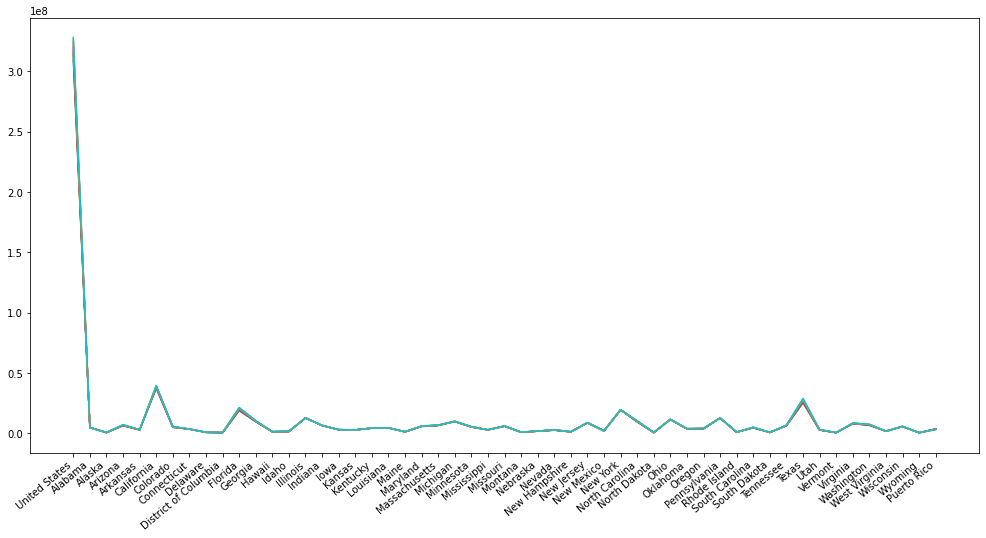

In [96]:
#https://datatofish.com/line-chart-python-matplotlib/ 
# year=['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
# Arkansas=df_pop2.loc[52,'2010':'2019']
#usa_pop=['309321666','311556874.0','313830990.0','315993715.0','318301008.0','320635163.0','322941311.0','324985539.0','326687501.0','328239523.0']
x=df_pop2.loc[:,'2010':'2019']
y=df_pop2.loc[:,'States']
current_graph=plt.gcf()
current_graph.set_size_inches(17,8)
plt.plot(y,x)
plt.xticks(rotation=40, horizontalalignment='right')

In [146]:
df_pop2.loc[15]

States                Indiana
Census                6483802
Estimates Base        6484051
2010                  6490432
2011              6.51653e+06
2012               6.5377e+06
2013              6.56871e+06
2014              6.59364e+06
2015              6.60842e+06
2016               6.6343e+06
2017              6.65808e+06
2018               6.6955e+06
2019              6.73222e+06
Name: 15, dtype: object

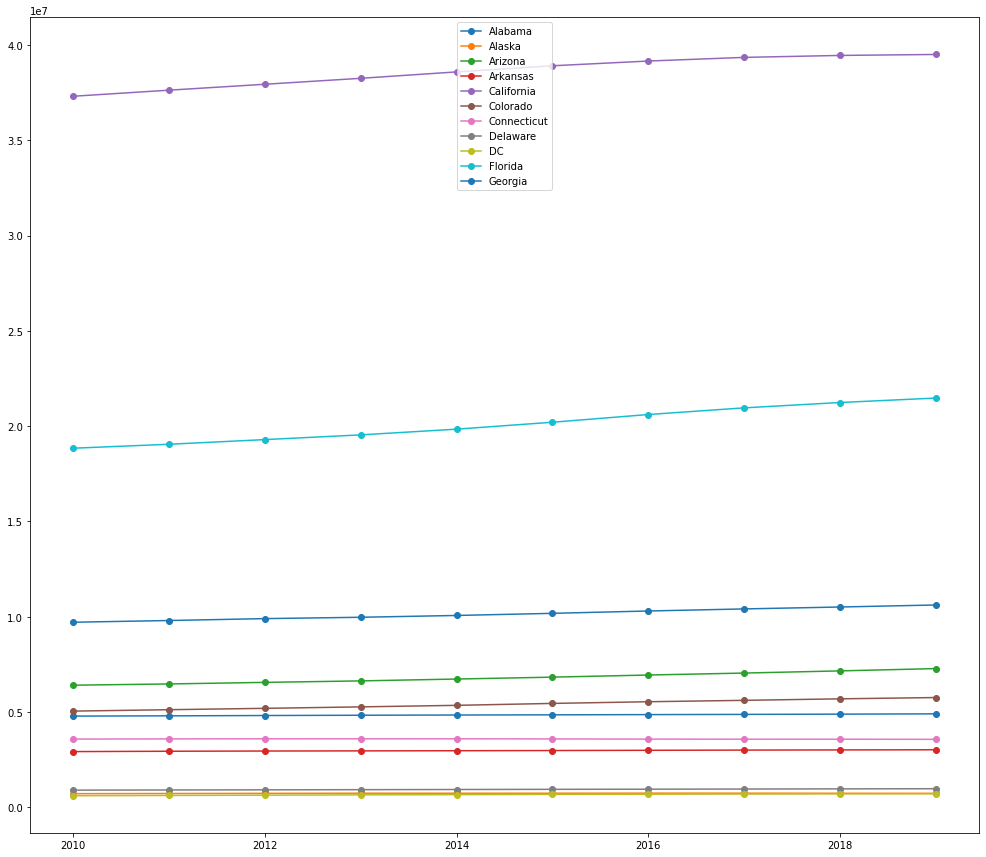

In [268]:
plt.figure(figsize=(17,15))
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
# USA=[309321666,311556874.0,313830990.0,315993715.0,318301008.0,320635163.0,322941311.0,324985539.0,326687501.0,328239523.0]
Alabama=[4785437,4799069.0,4815588.0,4830081.0,4841799.0,4852347.0,4863525.0,4874486.0,4887681.0,4903185.0]
Alaska=[713910,722128.0,730443.0,737068.0,736283.0,737498.0,741456.0,739700.0,735139.0,731545.0]
Arizona=df_pop2.loc[3,'2010':'2019']
Arkansas=df_pop2.loc[4,'2010':'2019']
California=df_pop2.loc[5,'2010':'2019']
Colorado=df_pop2.loc[6,'2010':'2019']
Connecticut=df_pop2.loc[7,'2010':'2019']
Delaware=df_pop2.loc[8,'2010':'2019']
DC=df_pop2.loc[9,'2010':'2019']
Florida=df_pop2.loc[10,'2010':'2019']
# Georgia=df_pop2.loc[11,'2010':'2019']
# Hawaii=df_pop2.loc[12,'2010':'2019']
# Idaho=df_pop2.loc[13,'2010':'2019']
# Illinois=df_pop2.loc[14,'2010':'2019']


# plt.plot(years,USA, label='USA')
plt.plot(years,Alabama, label='Alabama',marker='o')
plt.plot(years,Alaska,label= 'Alaska',marker='o')
plt.plot(years,Arizona,label='Arizona',marker='o')
plt.plot(years, Arkansas, label='Arkansas',marker='o')
plt.plot(years,California, label='California',marker='o')
plt.plot(years, Colorado, label='Colorado',marker='o')
plt.plot(years,Connecticut,label='Connecticut',marker='o')
plt.plot(years,Delaware,label='Delaware',marker='o')
plt.plot(years,DC,label='DC',marker='o')
plt.plot(years,Florida,label='Florida',marker='o')
plt.plot(years,Georgia,label='Georgia',marker='o')
# plt.plot(years,Hawaii,label='Hawaii',marker='o')
# plt.plot(years, Idaho, label='Idaho',marker='o')
# plt.plot(years,Illinois, label='Illinois',marker='o')



plt.legend()

In [256]:
df_pop2.loc[52]

States            Puerto Rico
Census                3725789
Estimates Base        3726157
2010                  3721525
2011              3.67873e+06
2012              3.63449e+06
2013              3.59308e+06
2014              3.53487e+06
2015              3.47323e+06
2016              3.40667e+06
2017              3.32529e+06
2018              3.19335e+06
2019              3.19369e+06
Name: 52, dtype: object

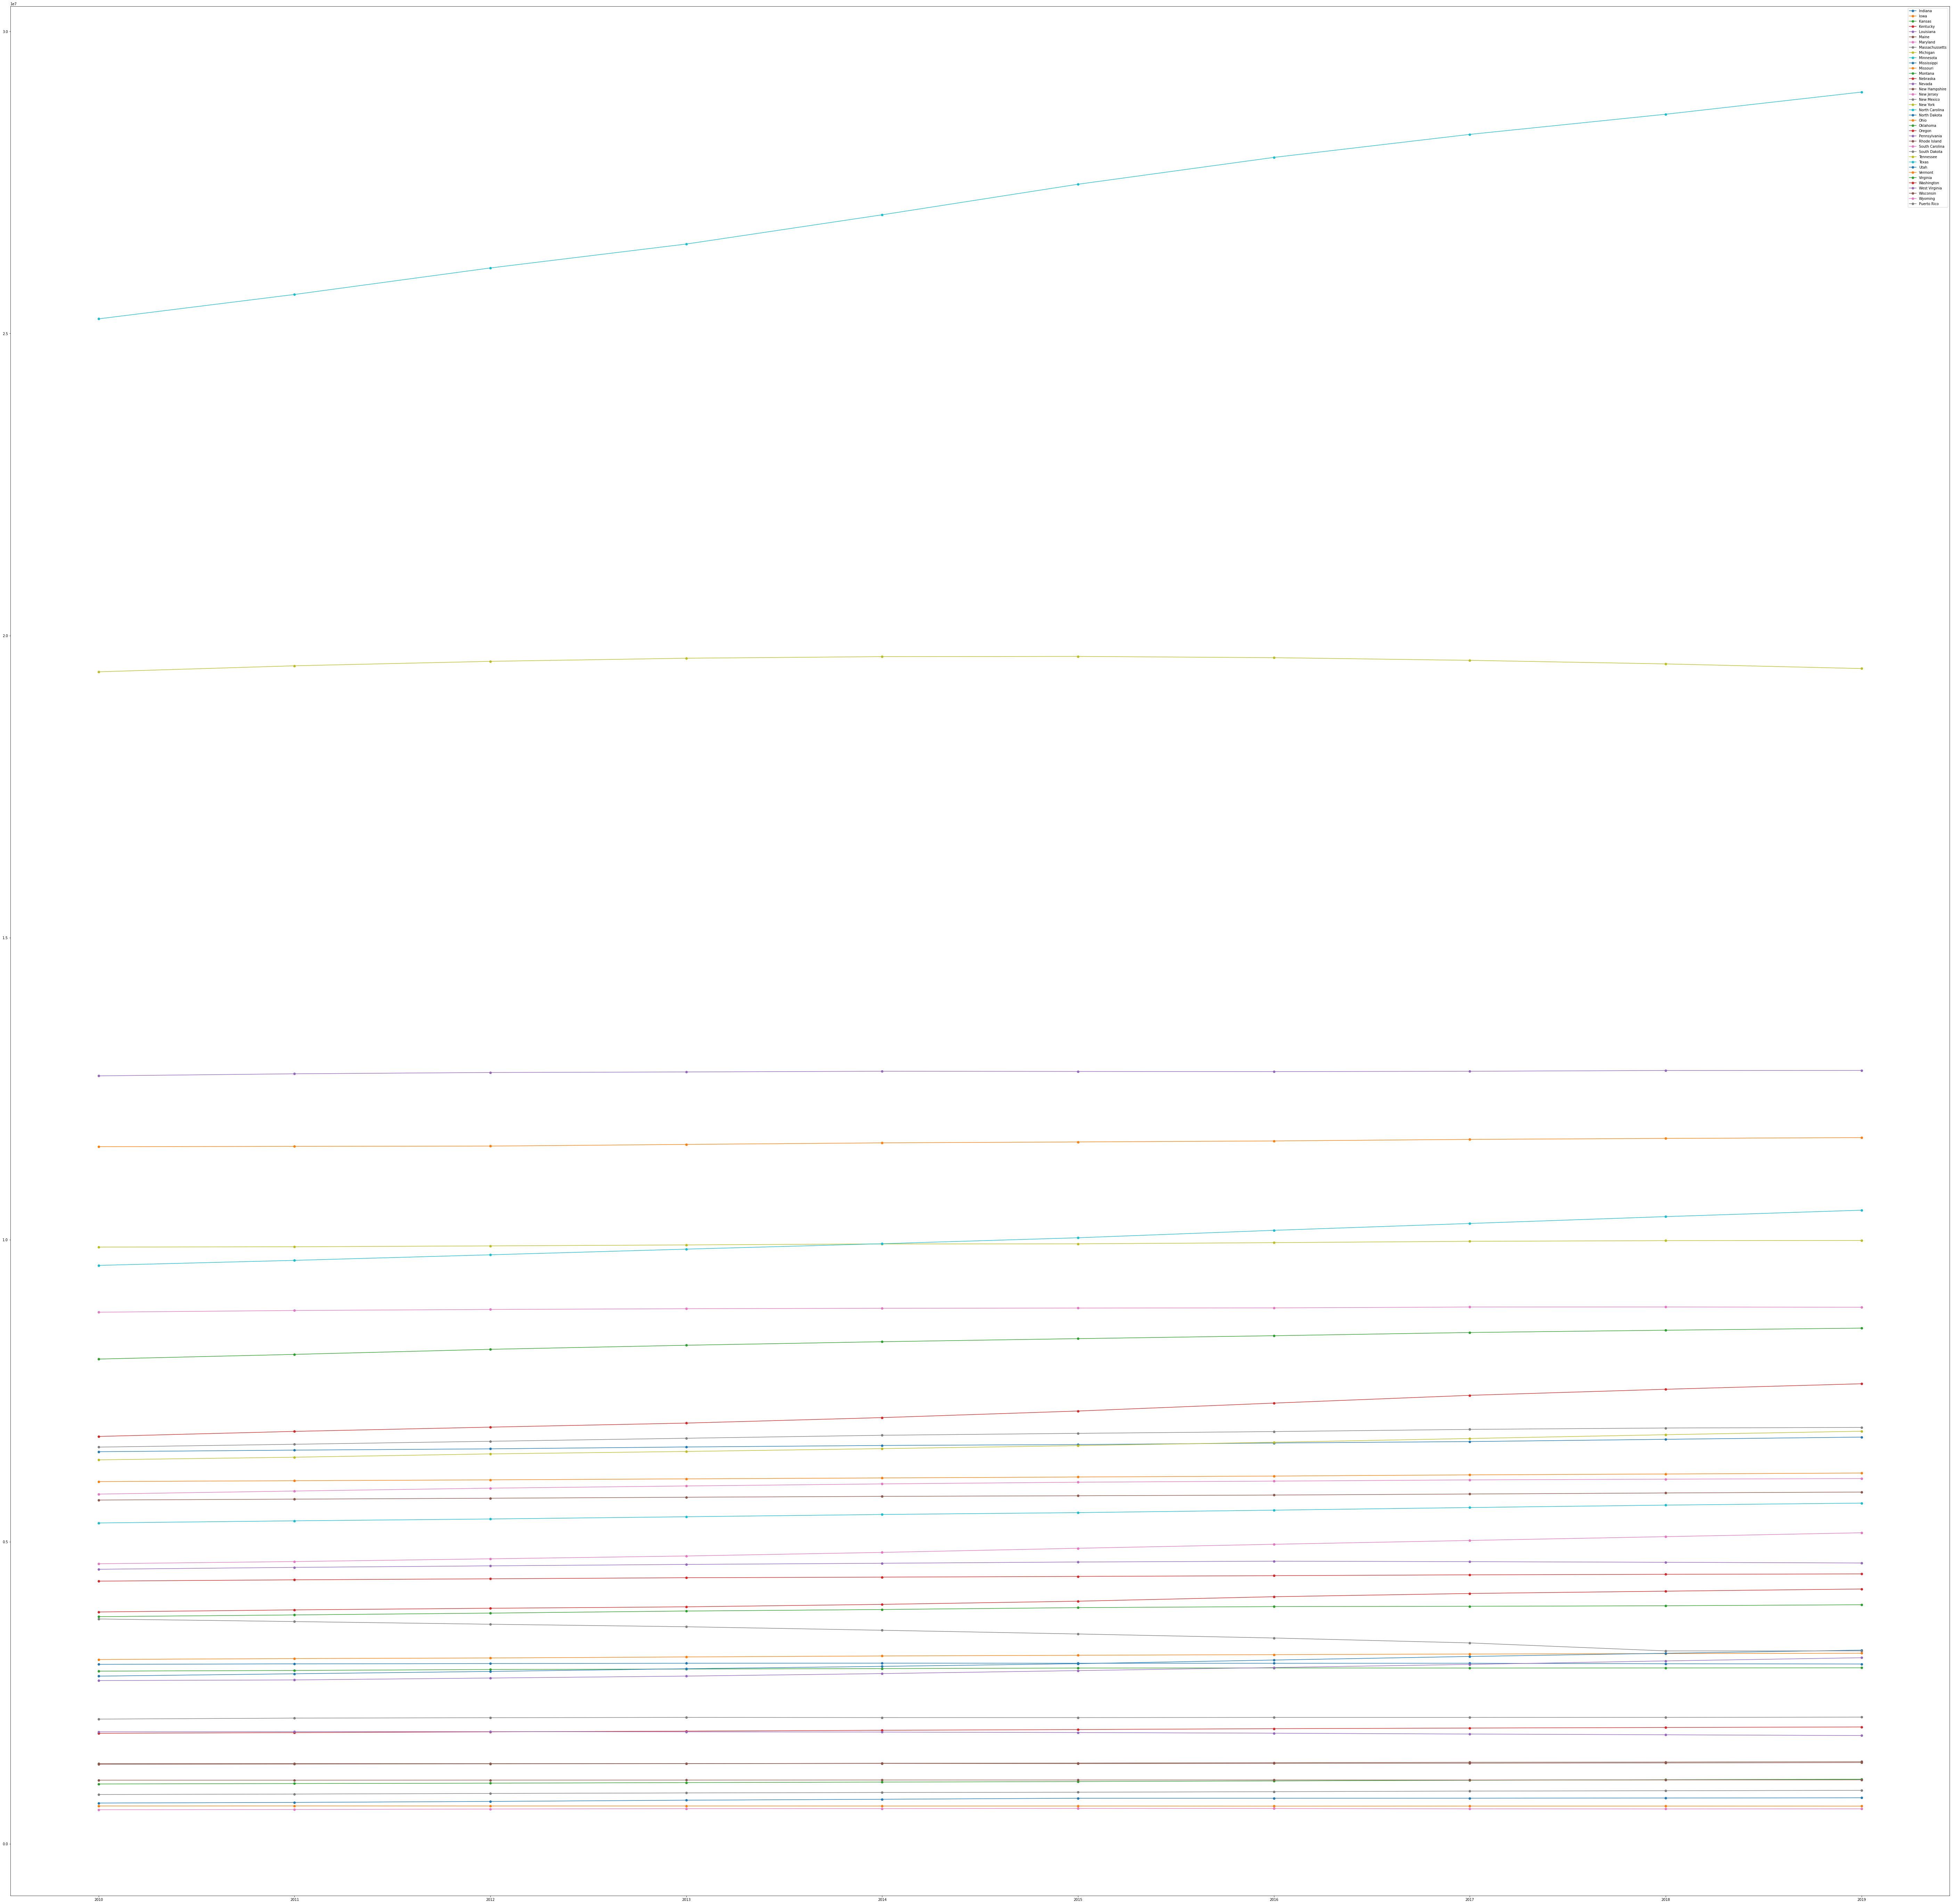

In [269]:
plt.figure(figsize=(100,100))
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]


Indiana=df_pop2.loc[15,'2010':'2019']
Iowa=df_pop2.loc[16,'2010':'2019']
Kansas=df_pop2.loc[17,'2010':'2019']
Kentucky=df_pop2.loc[18,'2010':'2019']
Louisiana=df_pop2.loc[19,'2010':'2019']
Maine=df_pop2.loc[20,'2010':'2019']

Maryland=df_pop2.loc[21,'2010':'2019']
Massachussetts=df_pop2.loc[22,'2010':'2019']
Michigan=df_pop2.loc[23,'2010':'2019']
Minnesota=df_pop2.loc[24,'2010':'2019']
Mississippi=df_pop2.loc[25,'2010':'2019']
Missouri=df_pop2.loc[26,'2010':'2019']
Montana=df_pop2.loc[27,'2010':'2019']
Nebraska=df_pop2.loc[28,'2010':'2019']
Nevada=df_pop2.loc[29,'2010':'2019']
New_Hampshire=df_pop2.loc[30,'2010':'2019']

New_Jersey=df_pop2.loc[31,'2010':'2019']
New_Mexico=df_pop2.loc[32,'2010':'2019']
New_York=df_pop2.loc[33,'2010':'2019']
North_Carolina=df_pop2.loc[34,'2010':'2019']
North_Dakota=df_pop2.loc[35,'2010':'2019']
Ohio=df_pop2.loc[36,'2010':'2019']
Oklahoma=df_pop2.loc[37,'2010':'2019']
Oregon=df_pop2.loc[38,'2010':'2019']
Pennsylvania=df_pop2.loc[39,'2010':'2019']
Rhode_Island=df_pop2.loc[40,'2010':'2019']

South_Carolina=df_pop2.loc[41,'2010':'2019']
South_Dakota=df_pop2.loc[42,'2010':'2019']
Tennessee=df_pop2.loc[43,'2010':'2019']
Texas=df_pop2.loc[44,'2010':'2019']
Utah=df_pop2.loc[45,'2010':'2019']
Vermont=df_pop2.loc[46,'2010':'2019']
Virginia=df_pop2.loc[47,'2010':'2019']
Washington=df_pop2.loc[48,'2010':'2019']
West_Virginia=df_pop2.loc[49,'2010':'2019']
Wisconsin=df_pop2.loc[50,'2010':'2019']

Wyoming=df_pop2.loc[51,'2010':'2019']
Puerto_Rico=df_pop2.loc[52,'2010':'2019']


plt.plot(year,Indiana,label='Indiana',marker='o')
plt.plot(year,Iowa,label='Iowa',marker='o')
plt.plot(year,Kansas,label='Kansas',marker='o')
plt.plot(year,Kentucky,label='Kentucky',marker='o')
plt.plot(year,Louisiana,label='Louisiana',marker='o')
plt.plot(year,Maine,label='Maine',marker='o')

plt.plot(year,Maryland,label='Maryland',marker='o')
plt.plot(year,Massachussetts,label='Massachussetts',marker='o')
plt.plot(year,Michigan,label='Michigan',marker='o')
plt.plot(year,Minnesota,label='Minnesota',marker='o')
plt.plot(year,Mississippi,label='Mississippi',marker='o')
plt.plot(year,Missouri,label='Missouri',marker='o')
plt.plot(year,Montana,label='Montana',marker='o')
plt.plot(year,Nebraska,label='Nebraska',marker='o')
plt.plot(year,Nevada,label='Nevada',marker='o')
plt.plot(year,New_Hampshire,label='New Hampshire',marker='o')

plt.plot(year,New_Jersey,label='New Jersey',marker='o')
plt.plot(year,New_Mexico,label='New Mexico',marker='o')
plt.plot(year,New_York,label='New York',marker='o')
plt.plot(year,North_Carolina, label='North Carolina',marker='o')
plt.plot(year,North_Dakota, label='North Dakota',marker='o')
plt.plot(year,Ohio,label='Ohio',marker='o')
plt.plot(year,Oklahoma,label='Oklahoma',marker='o')
plt.plot(year,Oregon,label='Oregon',marker='o')
plt.plot(year,Pennsylvania,label='Pennsylvania',marker='o')
plt.plot(year,Rhode_Island,label='Rhode Island',marker='o')

plt.plot(year,South_Carolina, label='South Carolina',marker='o')
plt.plot(year,South_Dakota, label='South Dakota',marker='o')
plt.plot(year,Tennessee, label='Tennessee',marker='o')
plt.plot(year,Texas,label='Texas',marker='o')
plt.plot(year,Utah,label='Utah',marker='o')
plt.plot(year,Vermont,label='Vermont',marker='o')
plt.plot(year,Virginia,label='Virginia',marker='o')
plt.plot(year,Washington,label='Washington',marker='o')
plt.plot(year,West_Virginia,label='West Virginia',marker='o')
plt.plot(year,Wisconsin,label='Wisconsin',marker='o')

plt.plot(year,Wyoming,label='Wyoming',marker='o')
plt.plot(year,Puerto_Rico,label='Puerto Rico',marker='o')

plt.legend()